In [1]:
%matplotlib inline
import numpy as np
import matplotlib,matplotlib.pyplot as plt

In [98]:
K_RANGE = 2**np.arange(2, 7)
NC_RANGE = 2**np.arange(7, 14)
NF_RANGE = 2**np.arange(7, 12)
KNC = 1000
KNF = 100
NCNF = 100
NCK = 10
NFNC = 1000
NFK = 10

In [115]:
def read_results(filename):
    
    nf = KNF
    nc = KNC
    k_confs = {}
    for k in K_RANGE:
        k_confs[(nf, nc, k)] = []

    ##################################################
    # Change nc (Client set size)
    ##################################################
    nf = NCNF
    k = NCK
    nc_confs = {}
    for nc in NC_RANGE:
        nc_confs[(nf, nc, k)] = []

    nc = NFNC
    k = NFK
    nf_confs = {}
    for nf in NF_RANGE:
        nf_confs[(nf, nc, k)] = []    

    
    with open(filename, "r") as f:
        for l in f:
            s = l.strip("\n").split(",")
            key = (int(s[0]), int(s[1]), int(s[2]))
            duration = float(s[3])
            for conf in [k_confs, nf_confs, nc_confs]:
                if key in conf:
                    conf[key].append(duration)
    return {"k": k_confs, "nf": nf_confs, "nc": nc_confs}

In [116]:
res_ours = read_results("res_ours.csv")
res_baseline = read_results("res_baseline.csv")

In [117]:
res_ours

{'k': {(100, 1000, 4): [0.012172937393188477,
   0.01165318489074707,
   0.012438297271728516,
   0.015607118606567383,
   0.007773399353027344,
   0.009802818298339844,
   0.009267568588256836,
   0.01166677474975586,
   0.011976003646850586,
   0.006766319274902344],
  (100, 1000, 8): [0.013993263244628906,
   0.013311386108398438,
   0.008481264114379883,
   0.017549514770507812,
   0.013829231262207031,
   0.016042232513427734,
   0.015299320220947266,
   0.008816957473754883,
   0.013523578643798828,
   0.011998176574707031],
  (100, 1000, 16): [0.03484654426574707,
   0.03614687919616699,
   0.03155708312988281,
   0.03439188003540039,
   0.032898664474487305,
   0.034218788146972656,
   0.01578354835510254,
   0.03325152397155762,
   0.04033970832824707,
   0.029967069625854492],
  (100, 1000, 32): [0.06314516067504883,
   0.06860780715942383,
   0.08010125160217285,
   0.060231685638427734,
   0.0500340461730957,
   0.06380629539489746,
   0.07302451133728027,
   0.060363054275

In [118]:
# These functions return appropriate dictionary keys for the different experimental setups
def keyf_k(v):
    return (KNF, KNC, v)
def keyf_nc(v):
    return (NCNF, v, NCK)
def keyf_nf(v):
    return (v, NFNC, NFK)

plot_confs = {"k":(K_RANGE, "k", keyf_k), "nc":(NC_RANGE, "Number of clients", keyf_nc), "nf":(NF_RANGE, "Number of facilities", keyf_nf)}

k
nc
nf


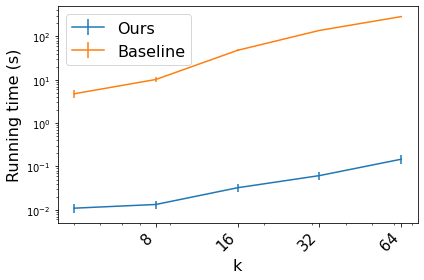

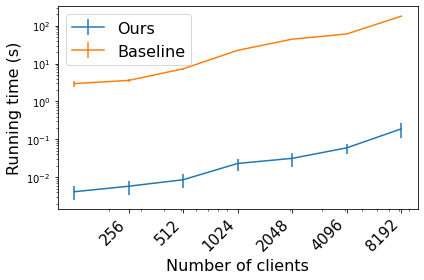

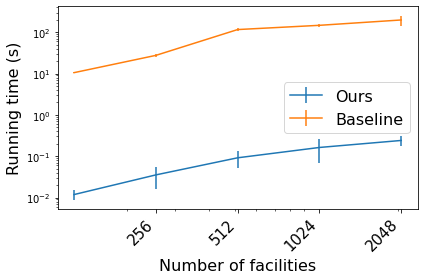

In [124]:
for key in plot_confs:
    RANGE = plot_confs[key][0]
    print(key)
    
    means_ours = []
    means_baseline = []
    stds_ours = []
    stds_baseline = []
    keyf = plot_confs[key][2]
    for i in RANGE:
        conf_key = keyf(i)
        means_ours.append(np.mean(res_ours[key][conf_key]))
        means_baseline.append(np.mean(res_baseline[key][conf_key]))
        stds_ours.append(np.std(res_ours[key][conf_key]))
        stds_baseline.append(np.std(res_baseline[key][conf_key]))        
    
    fig, ax = plt.subplots()
    #plt.plot(RANGE, means_ours, label="Ours")
    plt.errorbar(RANGE, means_ours, yerr=stds_ours, label="Ours")
    #plt.plot(RANGE, means_baseline, label="BFS")
    plt.errorbar(RANGE, means_baseline, yerr=stds_baseline, label="Baseline")


    plt.xscale("log")
    plt.yscale("log")
    plt.xticks(RANGE[1:],rotation=45, ha="right", fontsize=15)
    ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

    plt.xlabel(plot_confs[key][1
                              ], fontsize=16)
    plt.ylabel("Running time (s)", fontsize=16)

    plt.legend(fontsize=16, loc="best")
    plt.tight_layout()
    plt.savefig("images/loglog_results_{}.png".format(key))